<a href="https://colab.research.google.com/github/Mahyar1113/Geodesy_projects/blob/main/ANN_plasma_powerplant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# in this section we are going to predict the best site for installation plasma power plant

In [ ]:
pip install pandas numpy scikit-learn tensorflow

**read** **data**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Load the data
file_path = 'ANN_data.xlsx'  # Change this to your file path
df = pd.read_excel(file_path)




In [ ]:
# Split features and target
X = df.drop('target', axis=1).values
y = df['target'].values

# Adjust target labels from 1-5 to 0-4
y -= 1

# Check class distribution
class_counts = np.bincount(y)
print("Class distribution:", class_counts)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights for balancing
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))





Class distribution: [242050 339383 246860 159637  60645]


In [ ]:
# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.8808 - loss: 0.2728 - val_accuracy: 0.9952 - val_loss: 0.0124
Epoch 2/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9855 - loss: 0.0491 - val_accuracy: 0.9944 - val_loss: 0.0130
Epoch 3/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9984 - val_loss: 0.0058
Epoch 4/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9907 - loss: 0.0323 - val_accuracy: 0.9986 - val_loss: 0.0060
Epoch 5/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9919 - loss: 0.0284 - val_accuracy: 0.9975 - val_loss: 0.0080
Epoch 6/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9928 - loss: 0.0260 - val_accuracy: 0.9985 - val_loss: 0.0061
Epoch 7/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9930 - loss: 0.0251 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 8/10
22938/22938 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 

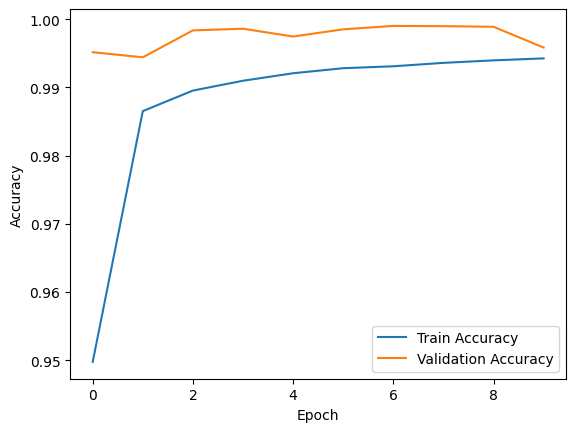

9831/9831 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9958 - loss: 0.0116
Test Loss: 0.011596409603953362
Test Accuracy: 0.9958419799804688


In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

9831/9831 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9958 - loss: 0.0116
Test Loss: 0.011596409603953362
Test Accuracy: 0.9958419799804688


In [ ]:
# Make predictions on the test set
from sklearn.metrics import classification_report # Import the classification_report function
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

9831/9831 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9913    0.9956     72361
           1     0.9929    1.0000    0.9964    101936
           2     0.9982    0.9981    0.9981     74003
           3     0.9909    0.9972    0.9940     48006
           4     1.0000    0.9782    0.9890     18267

    accuracy                         0.9958    314573
   macro avg     0.9964    0.9929    0.9946    314573
weighted avg     0.9959    0.9958    0.9958    314573



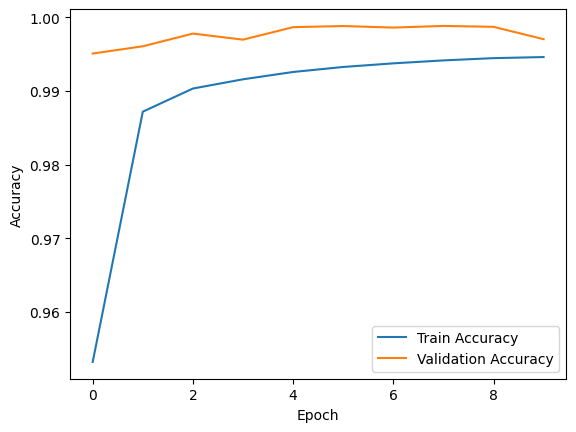

6554/6554 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9969 - loss: 0.0091
Test Loss: 0.008658844977617264
Test Accuracy: 0.9970197677612305


In [ ]:
y_pred_full = model.predict(X)  # Make predictions on the entire dataset
y_pred_full_classes = np.argmax(y_pred_full, axis=1)  # Convert one-hot encoded predictions to class labels

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step


In [ ]:
df_full = pd.read_excel(file_path)

In [ ]:
# Drop the 'target' column if it exists, as we are predicting it now
if 'target' in df_full.columns:
    df_full = df_full.drop('target', axis=1)

In [ ]:
# Extract features
X_full = df_full.values

In [ ]:
X_full_normalized = scaler.transform(X_full)  # Use the scaler fitted during training

In [ ]:
y_pred_full = model.predict(X_full_normalized)

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step


In [ ]:
y_pred_full.shape

(1048575, 5)

In [ ]:
y_pred_classes = np.argmax(y_pred_full, axis=1) + 1  # Adding 1 because classes were adjusted to start from 0 during training

In [ ]:
# Add the predicted values to the DataFrame
df_full['predicted_suitability'] = y_pred_classes

In [ ]:
df_full

,OBJECTID,X,Y,residential,fault_active,fault_total,Rivers,DIS_road,elevation,slop,flood,soil,landuse,predicted_suitability
0,1,348360.100599,4.074652e+06,1,1,1,7,5,3,3,1,3,6,2
1,2,348460.100599,4.074652e+06,1,1,1,7,5,3,3,1,3,6,2
2,3,348560.100599,4.074652e+06,1,1,1,5,5,3,3,1,3,6,1
3,4,348660.100599,4.074652e+06,1,1,1,5,5,3,3,1,3,6,1
4,5,348760.100599,4.074652e+06,1,1,1,5,5,3,3,1,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048571,399660.100599,4.143452e+06,1,7,9,3,9,9,9,5,6,5,5
1048571,1048572,399760.100599,4.143452e+06,1,7,9,3,9,9,9,5,6,5,5
1048572,1048573,399860.100599,4.143452e+06,1,7,9,3,9,9,9,5,6,5,5
1048573,1048574,399960.100599,4.143452e+06,1,7,9,1,9,9,9,5,6,5,5


from matplotlib import pyplot as plt
df_full['OBJECTID'].plot(kind='hist', bins=20, title='OBJECTID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_full['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_full['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_full['residential'].plot(kind='hist', bins=20, title='residential')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_full.plot(kind='scatter', x='OBJECTID', y='X', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_full.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_full.plot(kind='scatter', x='Y', y='residential', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_full.plot(kind='scatter', x='residential', y='fault_active', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['X']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_full.sort_values('OBJECTID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('X')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['Y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_full.sort_values('OBJECTID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('Y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['residential']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_full.sort_values('OBJECTID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('residential')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['fault_active']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_full.sort_values('OBJECTID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('fault_active')

from matplotlib import pyplot as plt
df_full['OBJECTID'].plot(kind='line', figsize=(8, 4), title='OBJECTID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_full['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_full['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_full['residential'].plot(kind='line', figsize=(8, 4), title='residential')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Save the DataFrame back to an Excel or CSV file for GIS import
df_full.to_csv('predicted_suitability.csv', index=False)